<center> <b> 4741 Bias and Variance </b> </center>
<center><b> HW 4, Question 4 </b> </center>
    <center><b>Aman jain (aj644@cornell.edu) </b> </center>

# a)

In [117]:
using Plots
using Statistics

Suppose we have a sinusoid function

In [2]:
f(x) = 10*sin.(x)

f (generic function with 1 method)

Our dataset $\mathcal D$ will consist of seven datapoints drawn from the following probabilistic model. 

For each datapoint we randomly draw $x_i$ uniformly in [0,6] and observe a noisy $y_i=f(x_i)+\epsilon_i$, where $\epsilon_i$ is some noise drawn from a standard normal distribution $\mathcal N(0,1)$.

Generate a sample dataset from this distribution.

In [147]:
using Random
d = 6*rand()
d

5.840382702837614

In [19]:
h = [[1,3],[4,5]]
h[1][1]

1

In [370]:
n = 7
D = zeros(n, 2)
for i = 1:n
    D[i,1] = 6*rand()
    D[i,2] = f(D[i,1])+randn() # 𝑦𝑖 = 𝑓(𝑥𝑖) + 𝜖𝑖
end
D

7×2 Array{Float64,2}:
 0.0991965   0.642399
 2.07209     7.69209 
 5.02041    -9.2755  
 5.704      -3.88525 
 2.86417     3.12726 
 3.367       0.262463
 3.64152    -5.40448 

Plot the dataset $\mathcal D$ and the true function $f(x)$.

In [150]:
"""plot function y=f(x)"""
function plotfunc_first(f;
    xmin=0,xmax=6,nsamples=1000)
    xsamples = range(xmin,stop=xmax,length=nsamples)
    plot(xsamples, [f(x) for x in xsamples], color="black")  ## only difference, when plotting new start with new plot
end

plotfunc_first

In [151]:
"""plot function y=f(x)"""
function plotfunc(f;
    xmin=0,xmax=6,nsamples=1000)
    xsamples = range(xmin,stop=xmax,length=nsamples)
    plot!(xsamples, [f(x) for x in xsamples], color="black")
end

plotfunc

# b)

Fit a linear model to $\mathcal D$

In [152]:
X = [D[:,1] ones(7)]
y = D[:,2]
w = X\y

2-element Array{Float64,1}:
 -2.3393846903270483
  4.76738932984979  

In [153]:
function l(x) 
    y_pred = [x 1]w
    return( y_pred[1])
end

l (generic function with 1 method)

In [154]:
l(0.5)

3.597696984686266

Plot the linear model $l(x)$ together with $\mathcal D$ and $f(x)$. Feel free to use our method $\verb|plotfunc(f)|$.

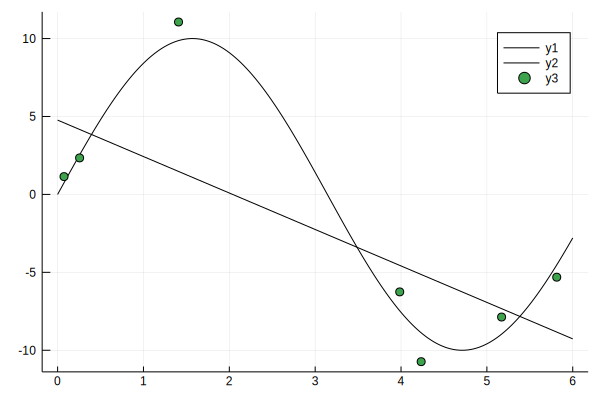

In [156]:
plotfunc_first(l)
plotfunc(f)
scatter!(D[:,1],D[:,2])

# c)

Fit a cubic model $c(x)$ to $\mathcal D$

In [157]:
# first, construct a Vandermonde matrix
max_order = 3
x = D[:,1]
V = zeros(n, max_order+1)
for k=0:max_order
    V[:,k+1] = x.^k
end

# solve least squares problem
w_c = V\D[:,2]
w_c

4-element Array{Float64,1}:
 -0.9290704184314104
 18.94177395481076  
 -9.017525168290522 
  0.9721339006409941

In [158]:
function c(x; order = max_order, w = w_c)
    y = 0
    for k=0:order
        y += w[k+1]*x^k
    end
    return y
end

c (generic function with 1 method)

In [159]:
c(0.5)

6.408952004481463

Plot the cubic model with $\mathcal D$ and $f(x)$

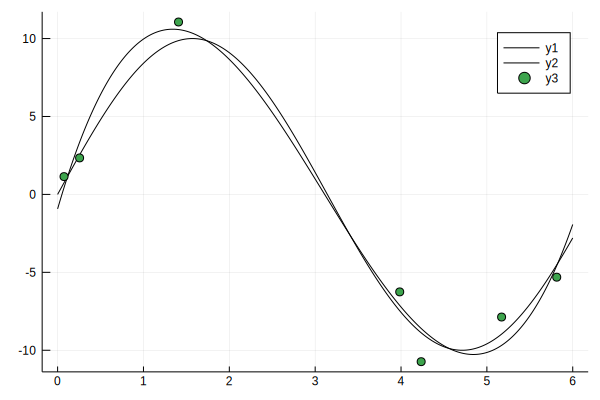

In [160]:
plotfunc_first(c)
plotfunc(f)
scatter!(D[:,1],D[:,2])

# d)

Repat the parts (b) and (c) for 1000 different sets $\mathcal D$. Compute $\bar{l}$ and $\bar{c}$, the average linear and average cubic models. (Please name $\bar{l}$ as l_avg(x) and $\bar{c}$ as c_avg(x) in following codes)

In [384]:
max_iter = 1000
w_l_bar_all_iter = zeros((2, max_iter))
for j = 1:max_iter
    D_l_bar = zeros((n, 2))
    for i = 1:n
        D_l_bar[i,1] = 6*rand()
        D_l_bar[i,2] = f(D_l_bar[i,1])+randn() # 𝑦𝑖 = 𝑓(𝑥𝑖) + 𝜖𝑖
    end
    X_l_bar = [D_l_bar[:,1] ones(7)]
    y_l_bar = D_l_bar[:,2]
    w_l_iter = X_l_bar\y_l_bar
    
    w_l_bar_all_iter[:,j] = w_l_iter
end    

w_l_bar_all_iter

2×1000 Array{Float64,2}:
 -3.53113  -1.29912   -1.83742  -4.51579  …  -6.83591  -2.72421  -3.97078
  9.97079  -0.797265   6.57384  14.8425      19.7701    7.50876  13.1563 

In [385]:
w_l_avg = mean(w_l_bar_all_iter, dims=2)

2×1 Array{Float64,2}:
 -3.7246094918268278
 11.442821369125939 

In [386]:
function l_avg(x) 
    y_pred = [x 1]w_l_avg
    return( y_pred[1])
end

l_avg (generic function with 1 method)

In [387]:
l_avg(0.5)

9.580516623212525

In [388]:
max_iter = 1000
max_order = 3
w_c_bar_all_iter = zeros((4, max_iter))
n = 7

for j = 1:max_iter
    D_c_bar = zeros((n, 2))
    for i = 1:n
        D_c_bar[i,1] = 6*rand()
        D_c_bar[i,2] = f(D_c_bar[i,1])+randn() # 𝑦𝑖 = 𝑓(𝑥𝑖) + 𝜖𝑖
    end
    
    x = D_c_bar[:,1]
    #print(x)
    V = zeros(n, max_order+1)
    for k=0:max_order
        V[:,k+1] = x.^k
    end

    # solve least squares problem
    w_c_iter = V\D_c_bar[:,2]
    #print(w_c_iter)
    #w_c_iter
    
    w_c_bar_all_iter[:,j] =  w_c_iter
end    

w_c_bar_all_iter

4×1000 Array{Float64,2}:
 -2.02624   -0.6236     -7.48199  …  -1.2245     0.397898   -2.13843
 17.8872    15.1926     28.2868      16.2158    15.085      21.5857 
 -8.62625   -7.29606   -12.9076      -7.51311   -7.60372   -10.1894 
  0.946467   0.786004    1.47059      0.789725   0.825389    1.1185 

In [389]:
w_c_avg = mean(w_c_bar_all_iter, dims=2)

4×1 Array{Float64,2}:
 -1.8907775436853607
 20.198840015115497 
 -9.348139968761021 
  0.9911502188652426

In [390]:
c_avg(x) = c(x; order = max_order, w = w_c_avg)

c_avg (generic function with 1 method)

In [391]:
c_avg(0.5)

5.995501249040287

Plot $\bar{l}$ together with $f(x)$.

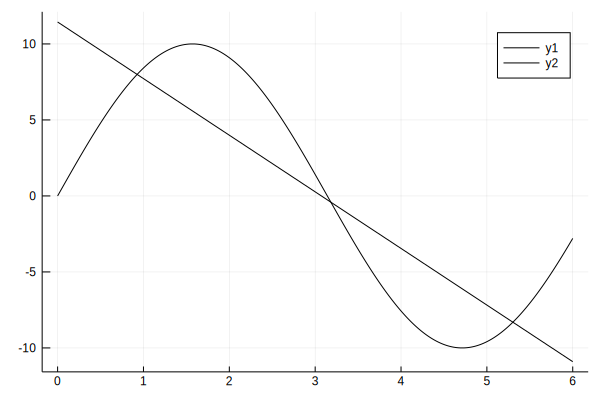

In [392]:
plotfunc_first(l_avg)
plotfunc(f)

Plot $\bar{c}(x)$ together with $f(x)$.

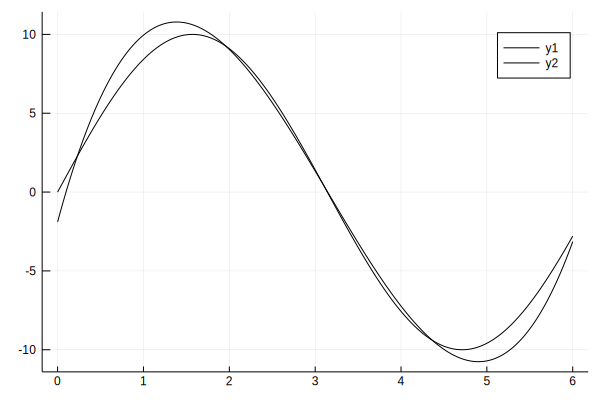

In [393]:
plotfunc_first(c_avg)
plotfunc(f)

# e)

Compute the bias of $\bar{l}$. You can use our integrate function.

In [436]:
function integrate(f, a, b)
    n = 1000
    delta = (b - a)/n;  		   ## nothing to change below here
    xs = a*ones(n) + [0:1:n-1;] * delta;          ## n, right is 1:n * delta 
    fx = map(f, xs);               
    return sum(fx) * delta
end

integrate (generic function with 1 method)

In [440]:
g_l(x) = (f(x) - l_avg(x))^2

g_l (generic function with 1 method)

In [441]:
bias_l_bar = integrate(g_l,0,6)

104.67372562845834

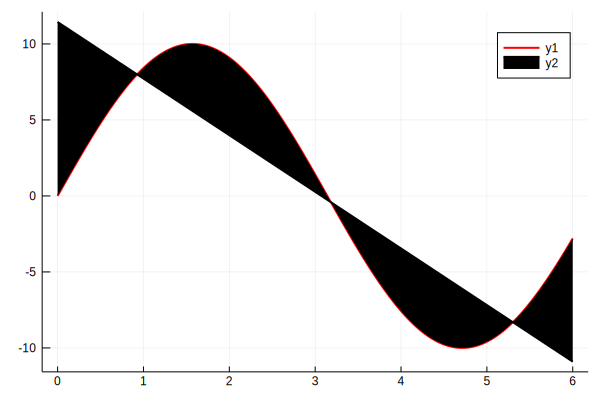

In [442]:
x_range = range(0,stop=6,length=1000)
x = [x for x in x_range]
y = f(x)
y_2 = [l_avg(x) for x in x_range]
plot(x, y, color="red", linewidth=2.0)
plot!(x, y_2, fillrange=[y y_2], color="black", linewidth=2.0)

Compute the bias of the cubic model $\bar{c}(x)$.

In [443]:
g_c(x) = (f(x) - c_avg(x))^2

g_c (generic function with 1 method)

In [444]:
bias_c_bar = integrate(g_c,0,6)

4.63894175311889

We can interpret the bias as how far off our averaged model is from the true function. One way to visually see this is by plotting $\bar{l}(x)$ with $f(x)$ and color in their difference. Try out the plotting function below.

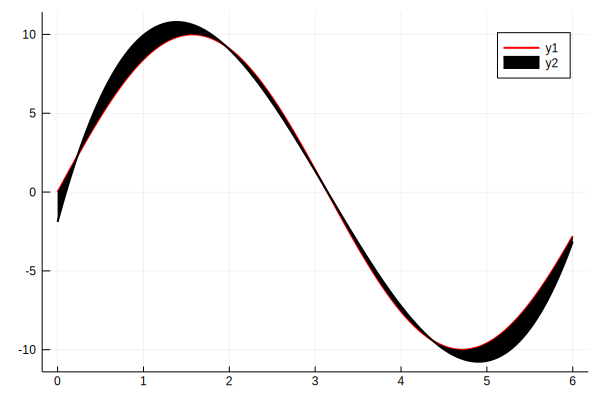

In [445]:
x_range = range(0,stop=6,length=1000)
x = [x for x in x_range]
y = f(x)
y_2 = [c_avg(x) for x in x_range]
plot(x, y, color="red", linewidth=2.0)
plot!(x, y_2, fillrange=[y y_2], color="black", linewidth=2.0)
#plot!([x y_2], fillrange=[y y_2], fillalpha=0.3, c=:orange)

Which model has smaller bias?

<b>Polynomial model has a smaller bias (of 4.6) as compared to Linear model (which has a bias of 104). </b>

# f)

Next compute the variance of the linear model.

In [503]:
x_range = range(0,stop=6,length=1000)
x = [x for x in x_range]
Var_l = 0 

for i = 1:1000
    #print(x[i])
    X_1 = [x[i] 1]
    #print(i, X_1)
    #print(i,w_l_bar_all_iter[:,i])
    y_jth_model_pred = X_1*w_l_bar_all_iter[:,i]
    #print(y_jth_model_pred)
    #print(w_l_avg)
    y_l_avg_pred = X_1*w_l_avg
    Var_l = Var_l + (y_jth_model_pred[1] - y_l_avg_pred[1])^2   
end

variance_linear = Var_l*6/1000  #integration factor (b-a/n)

85.07503362489572

Compute the variance of the cubic model.

In [504]:
x_range = range(0,stop=6,length=1000)
x = [x for x in x_range]
Var_c = 0 

for i = 1:1000
    #print(x[i])
    X_1 = x[i]
    #print(i, X_1)
    #print(i,w_l_bar_all_iter[:,i])
    y_jth_model_pred = c(X_1, w=w_c_bar_all_iter[:,i])
    #print(y_jth_model_pred)
    #print(w_l_avg)
    y_c_avg_pred = c(X_1, w=w_c_avg)
    Var_c = Var_c + (y_jth_model_pred[1] - y_c_avg_pred[1])^2   
end

variance_cubic = Var_c*6/1000

343.0359823040535

In [505]:
total_error_linear = variance_linear + bias_l_bar  ## I am doing square while calculating bias term, hence not squaring it up here. 
total_error_cubic = variance_cubic + bias_c_bar
print("Total linear error: ",total_error_linear,"Total cubic error: ",total_error_cubic)

Total linear error: 189.74875925335408Total cubic error: 347.6749240571724

Which model had higher variance? How do you interpret this? Which model has smaller overall error?

<b>
<br> Cubic model has higher variance (343) as compared to linear model (85). 
<br> Total error is high for cubic model (347)  as compared to linear models (189). 

<br>This indicetes typical bias-variance tradeoff. Models with high values of bias (linear model in this case), undermine their training dataset (underfit) leading to not learn the trends in training dataset. consquently these models are simpler also. These models do not vary a great deal with change in training dataset. 

<br>High-variance are more complex and represent their training set well (at times overfit). However, these models are not able to handle random variation in test dataset and hence do not generalize well. 

<br>Ideally, one wants to choose a model with training error being low and generalize on out of set data as well - Alas! not easy to get there. 
</b>

# g)

How do you think your results would depend on the number of points in the data set $\mathcal D$? Feel free to perform an experiment to check. How many points would you need before the opposite model has smaller overall error?

[159.85614557980801 154.26763206676978 137.91061797595788 134.64880317859985 128.9448314153106; 183.2304051817007 290.5232693648684 39.78711971313455 53.50197959661283 26.843959071250108]

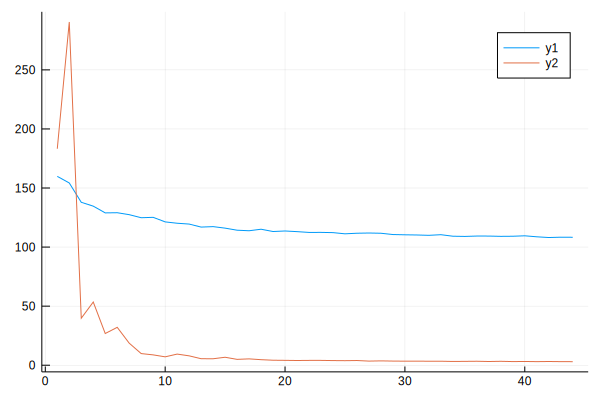

In [544]:
n_min = 7 # min data points
n_max = 50 #max data points
max_iter = 1000
x_range = range(0,stop=6,length=max_iter)
x = [x for x in x_range]
n_iter = n_max-n_min+1
max_order = 3

Variance_matrix = zeros((2,n_iter))
Bias_matrix = zeros((2,n_iter))
total_error_matrix = zeros((2,n_iter))

for n = n_min:n_max
    
    ## Linear model calculations start here
    w_l_bar_all_iter = zeros((2, max_iter))
    w_c_bar_all_iter = zeros((4, max_iter))
    
    for j = 1:max_iter
        D_bar = zeros((n, 2))
        for i = 1:n
            D_bar[i,1] = 6*rand()
            D_bar[i,2] = f(D_bar[i,1])+randn() # 𝑦𝑖 = 𝑓(𝑥𝑖) + 𝜖𝑖
        end
        X_l_bar = [D_bar[:,1] ones(n)]
        y_l_bar = D_bar[:,2]
        w_l_iter = X_l_bar\y_l_bar
        w_l_bar_all_iter[:,j] = w_l_iter
    
        
        b = D_bar[:,1]
        V = zeros(n, max_order+1)
        for k=0:max_order
            V[:,k+1] = b.^k
        end
        w_c_iter = V\D_bar[:,2]
        w_c_bar_all_iter[:,j] =  w_c_iter
    
    end    

    w_l_avg = mean(w_l_bar_all_iter, dims=2)
    Var_l = 0
    Bias_l = 0

    w_c_avg = mean(w_c_bar_all_iter, dims=2)
    Var_c = 0
    Bias_c = 0
    
    for k = 1:max_iter
        X_1 = [x[k] 1]
        y_jth_model_pred = X_1*w_l_bar_all_iter[:,k]
        y_l_avg_pred = X_1*w_l_avg
        Var_l = Var_l + (y_jth_model_pred[1] - y_l_avg_pred[1])^2
        Bias_l = Bias_l + (f(x[k][1])-y_l_avg_pred[1])^2
    
        X_c = x[k]
        y_jth_model_pred = c(X_c, w=w_c_bar_all_iter[:,k])
        y_c_avg_pred = c(X_c, w=w_c_avg)
        Var_c = Var_c + (y_jth_model_pred[1] - y_c_avg_pred[1])^2   
        Bias_c = Bias_c + (f(x[k][1])-y_c_avg_pred[1])^2
    
    end
    Variance_matrix[1,n-n_min+1] = Var_l*(6/max_iter)   ##integration factor
    Bias_matrix[1,n-n_min+1] = Bias_l*(6/max_iter)      ##integration factor 

    Variance_matrix[2,n-n_min+1] = Var_c*(6/max_iter)
    Bias_matrix[2,n-n_min+1] = Bias_c*(6/max_iter)   

end
    
total_error_matrix = Variance_matrix + Bias_matrix

#print(Variance_matrix)
#print(Bias_matrix)
    
print(total_error_matrix[:,1:5])
plot(total_error_matrix[1,:])
plot!(total_error_matrix[2,:])
    

<b>
As number of datapoints in D increases, bias comes down significantly. As n > 9, opposite model (in this case Cubic model) has lower totoal error than part (f). Errors for both models flattens out after 30 odd data points. </b>

# h)

Instead of sampling new data to compute the bias and variance of our model, we could use a bootstrap estimator to get more use out of the few data points we have. Try this for a few different data set sizes and report on your results. How big a data set is needed for the bootstrap to give a reliable estimate of the bias and variance?

<b>
<br> We can borrow some learnings from part g, where we saw affect of size of dataset (n) on total error. Total errors flattens after a certain point (somewhere around n= 27). 

<br> We can further study impact of n on bootstrapping by taking three values of n. n = 7, 15, 25. 
<br> Also I will be considering number of datapoints taken, k = 100. 
<br> Below we will be looking at the Confidence interval for each value of n. Half width for 95% Confidence interval should keep reducing as n increases. 
<br> I will be restricting this exercise of bootstrapping to linear models and look at variation of first cofficent of w in those models. Conclusions from this should hold for other models and other values of w as well. 
</b>

In [563]:
n_h = 35
K = 1000
max_iter = K
w_l_bar_all_iter = zeros((2, max_iter))
for j = 1:max_iter
    D_l_bar = zeros((n_h, 2))
    for i = 1:n_h
        D_l_bar[i,1] = 6*rand()
        D_l_bar[i,2] = f(D_l_bar[i,1])+randn() # 𝑦𝑖 = 𝑓(𝑥𝑖) + 𝜖𝑖
    end
    X_l_bar = [D_l_bar[:,1] ones(n_h)]
    y_l_bar = D_l_bar[:,2]
    w_l_iter = X_l_bar\y_l_bar
    
    w_l_bar_all_iter[:,j] = w_l_iter
end    

z = w_l_bar_all_iter[1,:]   #first cofficent of w
UB = mean(z) + 1.96*sqrt(var(z)/K) # 95% confidence interval
LB = mean(z) - 1.96*sqrt(var(z)/K)
print("n = ", n_h, "; k = ", K, "; Confidence interval = ", LB,",", UB, "; Half width = ", (UB-LB)/2)

n = 35; k = 1000; Confidence interval = -3.5192832189851346,-3.457504226763966; Half width = 0.030889496110584336

<b>
<br> n = 7; k = 100; Confidence interval = -3.8342240783025403,-3.301831389430105; Half width = 0.26619634443621765
<br> n = 15; k = 100; Confidence interval = -3.807226401341788,-3.4520754000707012; Half width = 0.17757550063554328
<br> n = 25; k = 100; Confidence interval = -3.6357753693738997,-3.4047754358186473; Half width = 0.1154999667776262
<br> n = 35; k = 100; Confidence interval = -3.5271356160037763,-3.3509984924327982; Half width = 0.08806856178548905
<br> n = 100; k = 100; Confidence interval = -3.524302390585087,-3.4115248830183442; Half width = 0.05638875378337138


<br> n = 35; k = 10; Confidence interval = -3.7530071105002247,-3.0721762268779265; Half width = 0.34041544181114913
<br> n = 35; k = 50; Confidence interval = -3.588653833079747,-3.2770852642801134; Half width = 0.15578428439981673
<br> n = 35; k = 100; Confidence interval = -3.6330291669220243,-3.4462648808811265; Half width = 0.0933821430204489
<br> n = 35; k = 1000; Confidence interval = -3.5192832189851346,-3.457504226763966; Half width = 0.030889496110584336

<br> As we can see from above data points: 

<br> 1. As n and k increases half width reduces, which means with more confidence we can locate true value of w[1]. 
<br> 2. this makes intuitive sense, as higher the K (number of samples withdrawn), more close the estimates will be to actual. 
<br> 3. For our use case n = 25-35 and K~100 should give 95% confidence interval of half width within 1.5% of the mean can be achieved. 

</b>


